In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import constants 
import numpy as np


In [4]:
with open('data.csv','r') as f:
    df = pd.read_csv('data.csv')
    

In [5]:
df.head(10)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


In [7]:
df.head(11)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [8]:
#
new_df = df.dropna()
new_df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  164 non-null    int64  
 1   Pulse     164 non-null    int64  
 2   Maxpulse  164 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.4 KB


In [10]:
new_df = new_df.reset_index(drop=True)
new_df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
159,60,105,140,290.8
160,60,110,145,300.0
161,60,115,145,310.2
162,75,120,150,320.4


In [11]:
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [12]:
#df.dropna(subset=['Date'],inplace=True)

In [13]:
df.dropna(inplace=True)
df = df.reset_index(drop=True)
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
159,60,105,140,290.8
160,60,110,145,300.0
161,60,115,145,310.2
162,75,120,150,320.4


In [14]:
# Loop through all values in Duration column, set boundaries to 120
for x in df.index:
    if df.loc[x,'Duration']>120:
        df.loc[x,'Duration']=120

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
159,60,105,140,290.8
160,60,110,145,300.0
161,60,115,145,310.2
162,75,120,150,320.4


In [17]:
df.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.251712,-0.086029,0.820359
Pulse,-0.251712,1.000000,0.784994,0.015301
Maxpulse,-0.086029,0.784994,1.000000,0.195309
Calories,0.820359,0.015301,0.195309,1.000000


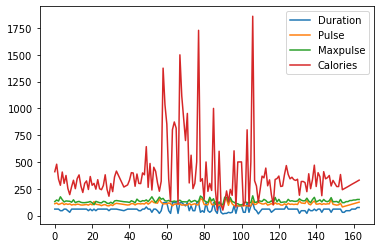

In [18]:
df.plot()

plt.show()

In [19]:
json_df =  pd.read_json('data.js')
json_df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.4
166,60,115,145,310.2
167,75,120,150,320.4


In [20]:
constants.liter

0.001

In [21]:
import scipy

In [22]:
scipy.__version__

'1.7.1'

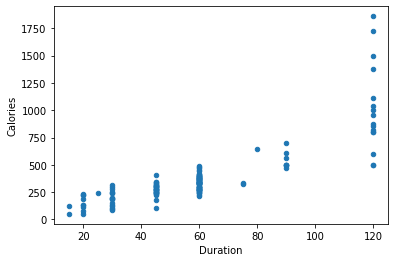

In [23]:
df.plot(kind = 'scatter', x = 'Duration', y = 'Calories')

plt.show()


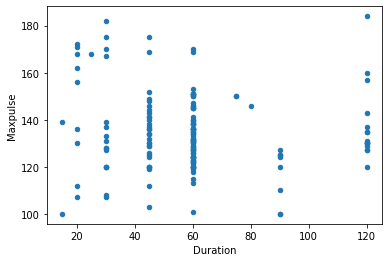

In [24]:
df.plot(kind = 'scatter', x = 'Duration', y = 'Maxpulse')

plt.show()


<AxesSubplot:ylabel='Frequency'>

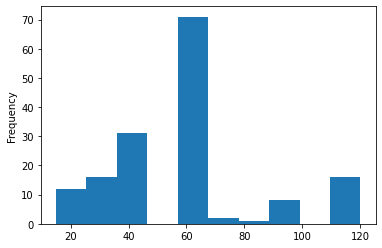

In [25]:
df['Duration'].plot(kind='hist')

In [26]:
from scipy.sparse import csr_matrix

In [29]:
arr = np.array([0,0,0,0,0,1,1,0,2])

In [31]:
print(csr_matrix(arr))

  (0, 5)	1
  (0, 6)	1
  (0, 8)	2
